TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=2538, maxbars=100000, codepage=1252, ping_last=21530, community_balance=0.0, retransmission=0.0, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='French', path='C:\\Program Files\\MetaTrader 5', ...)
(500, 2538, '16 Jul 2020')
euraud_ticks( 1000 )
(1580212800, 1.6327, 1.63296, 0., 0, 1580212800190, 130, 0.)
(1580212801, 1.6327, 1.63295, 0., 0, 1580212801202, 4, 0.)
(1580212801, 1.63266, 1.63292, 0., 0, 1580212801411, 134, 0.)
(1580212801, 1.63266, 1.63293, 0., 0, 1580212801912, 4, 0.)
(1580212802, 1.63266, 1.63292, 0., 0, 1580212802919, 4, 0.)
(1580212803, 1.63266, 1.63293, 0., 0, 1580212803124, 4, 0.)
(1580212803, 1.63266, 1.63294, 0., 0, 1580212803426, 4, 0.)
(1580212805, 1.6326, 1.63288, 0., 0, 1580212805219, 134, 0.)
(1580212806, 1.

c:\users\jonat\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)
c:\users\jonat\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


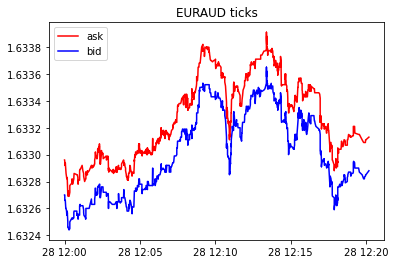

In [3]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
import MetaTrader5 as mt5

# connect to MetaTrader 5
if not mt5.initialize():
    print("initialize() failed")
    mt5.shutdown()

# request connection status and parameters
print(mt5.terminal_info())
# get data on MetaTrader 5 version
print(mt5.version())

# request 1000 ticks from EURAUD
euraud_ticks = mt5.copy_ticks_from("EURAUD", datetime(2020, 1, 28, 13), 1000, mt5.COPY_TICKS_ALL)
# request ticks from AUDUSD within 2019.04.01 13:00 - 2019.04.02 13:00
audusd_ticks = mt5.copy_ticks_range("AUDUSD", datetime(2020, 1, 27, 13), datetime(2020, 1, 28, 13), mt5.COPY_TICKS_ALL)

# get bars from different symbols in a number of ways
eurusd_rates = mt5.copy_rates_from("EURUSD", mt5.TIMEFRAME_M1, datetime(2020, 1, 28, 13), 1000)
eurgbp_rates = mt5.copy_rates_from_pos("EURGBP", mt5.TIMEFRAME_M1, 0, 1000)
eurcad_rates = mt5.copy_rates_range("EURCAD", mt5.TIMEFRAME_M1, datetime(2020, 1, 27, 13), datetime(2020, 1, 28, 13))

# shut down connection to MetaTrader 5
mt5.shutdown()

# DATA
print('euraud_ticks(', len(euraud_ticks), ')')
for val in euraud_ticks[:10]: print(val)

print('audusd_ticks(', len(audusd_ticks), ')')
for val in audusd_ticks[:10]: print(val)


print('eurgbp_rates(', len(eurgbp_rates), ')')
for val in eurgbp_rates[:10]: print(val)

print('eurcad_rates(', len(eurcad_rates), ')')
for val in eurcad_rates[:10]: print(val)

# PLOT
# create DataFrame out of the obtained data
ticks_frame = pd.DataFrame(euraud_ticks)
# convert time in seconds into the datetime format
ticks_frame['time'] = pd.to_datetime(ticks_frame['time'], unit='s')
# display ticks on the chart
plt.plot(ticks_frame['time'], ticks_frame['ask'], 'r-', label='ask')
plt.plot(ticks_frame['time'], ticks_frame['bid'], 'b-', label='bid')

# display the legends
plt.legend(loc='upper left')

# add the header
plt.title('EURAUD ticks')

# display the chart
plt.show()